# Classifying whether a tumor is benign or malignant using Deep Learning, implementing dropouts & early stopping for better metrics

<b>Importing required libraries<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Reading Data<b/>

In [2]:
df = pd.read_csv('Data\cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

<b>Finding important metrics wrt dataset<b/>

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<b>Doing countplot of the classes<b/>

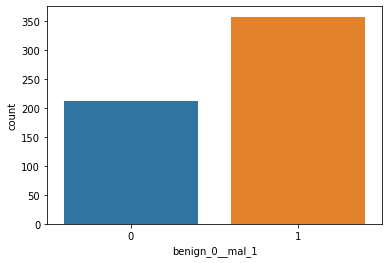

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

In [8]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<b>Adding barplots and heatmaps for understanding feature corelation<b/>

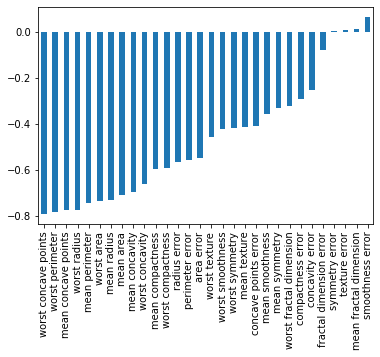

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

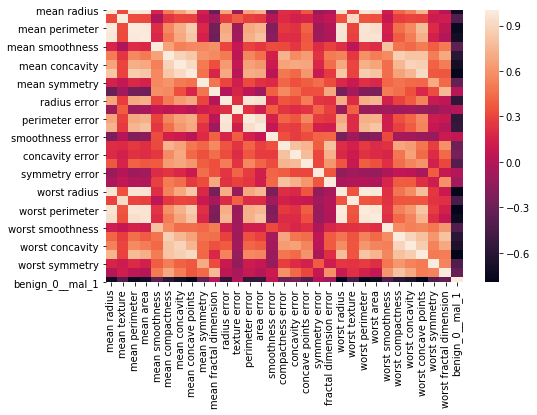

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr())

In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

<b>Scaling data and doing train-test split<b/>

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [16]:
X_train.shape

(426, 30)

In [17]:
y_train.shape

(426,)

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[0.20299115, 0.13626834, 0.20295764, ..., 0.45292096, 0.34558093,
        0.24236453],
       [0.36816697, 0.21090147, 0.35298183, ..., 0.42989691, 0.29910626,
        0.17484401],
       [0.36438071, 0.43689727, 0.35208348, ..., 0.55292096, 0.28321748,
        0.17674877],
       ...,
       [0.22996829, 0.3870021 , 0.21919701, ..., 0.23756014, 0.18510427,
        0.16210181],
       [0.22854844, 0.32201258, 0.21753853, ..., 0.14797251, 0.31717974,
        0.0690312 ],
       [0.07998485, 0.19874214, 0.07345726, ..., 0.        , 0.19642502,
        0.152578  ]])

<b>Creating the model<b/>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Sigmoid for Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
#Large epoch chosen to demonstrate OverFitiing
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6993 - val_loss: 0.6805
Epoch 2/600
426/426 [==============================] - 0s 112us/sample - loss: 0.6770 - val_loss: 0.6655
Epoch 3/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6588 - val_loss: 0.6490
Epoch 4/600
426/426 [==============================] - 0s 115us/sample - loss: 0.6390 - val_loss: 0.6285
Epoch 5/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6151 - val_loss: 0.6084
Epoch 6/600
426/426 [==============================] - 0s 117us/sample - loss: 0.5851 - val_loss: 0.5731
Epoch 7/600
426/426 [==============================] - 0s 117us/sample - loss: 0.5343 - val_loss: 0.5326
Epoch 8/600
426/426 [==============================] - 0s 117us/sample - loss: 0.4815 - val_loss: 0.4927
Epoch 9/600
426/426 [==============================] - 0s 115us/sample - loss: 0.4288 - val_loss: 0.4442
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0398 - val_loss: 0.1318
Epoch 79/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0398 - val_loss: 0.1272
Epoch 80/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0411 - val_loss: 0.1325
Epoch 81/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0418 - val_loss: 0.1251
Epoch 82/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0434 - val_loss: 0.1400
Epoch 83/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0421 - val_loss: 0.1241
Epoch 84/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0361 - val_loss: 0.1455
Epoch 85/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0397 - val_loss: 0.1296
Epoch 86/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0401 - val_loss: 0.1274
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0248 - val_loss: 0.1471
Epoch 156/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0246 - val_loss: 0.1636
Epoch 157/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0214 - val_loss: 0.1496
Epoch 158/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0234 - val_loss: 0.1538
Epoch 159/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0260 - val_loss: 0.1542
Epoch 160/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0225 - val_loss: 0.1556
Epoch 161/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0222 - val_loss: 0.1529
Epoch 162/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0227 - val_loss: 0.1609
Epoch 163/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0215 - val_loss: 0.1541
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 108us/sample - loss: 0.0150 - val_loss: 0.1861
Epoch 232/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0142 - val_loss: 0.1942
Epoch 233/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0147 - val_loss: 0.1905
Epoch 234/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0142 - val_loss: 0.1939
Epoch 235/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0145 - val_loss: 0.1873
Epoch 236/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0153 - val_loss: 0.1879
Epoch 237/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0141 - val_loss: 0.1914
Epoch 238/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0139 - val_loss: 0.1924
Epoch 239/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0137 - val_loss: 0.1933
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 110us/sample - loss: 0.0085 - val_loss: 0.2330
Epoch 308/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0092 - val_loss: 0.2428
Epoch 309/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0091 - val_loss: 0.2230
Epoch 310/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0092 - val_loss: 0.2254
Epoch 311/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0081 - val_loss: 0.2362
Epoch 312/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0079 - val_loss: 0.2326
Epoch 313/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0077 - val_loss: 0.2317
Epoch 314/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0071 - val_loss: 0.2414
Epoch 315/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0071 - val_loss: 0.2347
Epoch 316/600
426/426 [=============================

426/426 [==============================] - 0s 115us/sample - loss: 0.0037 - val_loss: 0.2811
Epoch 384/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0039 - val_loss: 0.2889
Epoch 385/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0045 - val_loss: 0.2907
Epoch 386/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0041 - val_loss: 0.2874
Epoch 387/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0037 - val_loss: 0.2985
Epoch 388/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0039 - val_loss: 0.2818
Epoch 389/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0037 - val_loss: 0.2948
Epoch 390/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0035 - val_loss: 0.3060
Epoch 391/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0043 - val_loss: 0.2903
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 117us/sample - loss: 0.0020 - val_loss: 0.3354
Epoch 460/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0021 - val_loss: 0.3630
Epoch 461/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0019 - val_loss: 0.3460
Epoch 462/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0020 - val_loss: 0.3531
Epoch 463/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0019 - val_loss: 0.3539
Epoch 464/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0019 - val_loss: 0.3549
Epoch 465/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0019 - val_loss: 0.3572
Epoch 466/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0020 - val_loss: 0.3596
Epoch 467/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0022 - val_loss: 0.3511
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 101us/sample - loss: 0.0010 - val_loss: 0.4135
Epoch 536/600
426/426 [==============================] - 0s 120us/sample - loss: 9.6423e-04 - val_loss: 0.4267
Epoch 537/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0010 - val_loss: 0.4191
Epoch 538/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0014 - val_loss: 0.4137
Epoch 539/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0020 - val_loss: 0.3929
Epoch 540/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0016 - val_loss: 0.4441
Epoch 541/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0011 - val_loss: 0.4254
Epoch 542/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0010 - val_loss: 0.4268
Epoch 543/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0010 - val_loss: 0.4221
Epoch 544/600
426/426 [========================

<b>Plotting losses<b/>

In [25]:
losses = pd.DataFrame(model.history.history)

In [26]:
losses.head()

,loss,val_loss
0,0.699290,0.680522
1,0.676951,0.665517
2,0.658753,0.649048
3,0.638981,0.628529
4,0.615081,0.608398


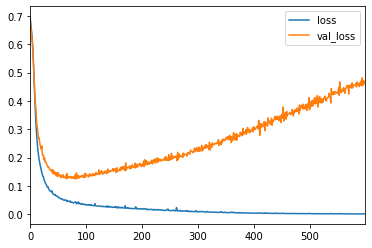

In [27]:
losses.plot()

<b>As clear from above, our model is Overfitting as he val_loss is increasing continuously from the elbow region<b/>

<b>Using callback for early stops<b/>

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Sigmoid for Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6786 - val_loss: 0.6773
Epoch 2/600
426/426 [==============================] - 0s 141us/sample - loss: 0.6530 - val_loss: 0.6582
Epoch 3/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6218 - val_loss: 0.6307
Epoch 4/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5823 - val_loss: 0.5969
Epoch 5/600
426/426 [==============================] - 0s 117us/sample - loss: 0.5318 - val_loss: 0.5530
Epoch 6/600
426/426 [==============================] - 0s 124us/sample - loss: 0.4784 - val_loss: 0.5078
Epoch 7/600
426/426 [==============================] - 0s 124us/sample - loss: 0.4242 - val_loss: 0.4544
Epoch 8/600
426/426 [==============================] - 0s 120us/sample - loss: 0.3727 - val_loss: 0.4214
Epoch 9/600
426/426 [==============================] - 0s 113us/sample - loss: 0.3301 - val_loss: 0.3748
Epoch 10/60

426/426 [==============================] - 0s 96us/sample - loss: 0.0405 - val_loss: 0.1254
Epoch 79/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0378 - val_loss: 0.1309
Epoch 80/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0380 - val_loss: 0.1250
Epoch 81/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0380 - val_loss: 0.1314
Epoch 82/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0372 - val_loss: 0.1293
Epoch 83/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0364 - val_loss: 0.1267
Epoch 84/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0372 - val_loss: 0.1287
Epoch 85/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0407 - val_loss: 0.1336
Epoch 86/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0363 - val_loss: 0.1267
Epoch 87/600
426/426 [==============================] - 0s 103u

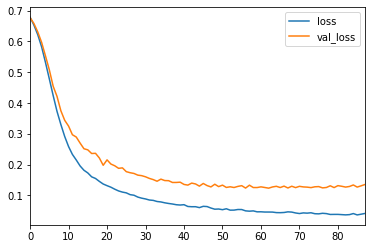

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

<b>From above we can see that val_loss has a downward and flat trend which is the expected behaviour<b/>

In [33]:
from tensorflow.keras.layers import Dropout

<b>Adding Dropouts<b/>

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
#Random selection of 50% of neurons to be turned off in each batch
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#Sigmoid for Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6884 - val_loss: 0.6835
Epoch 2/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6876 - val_loss: 0.6700
Epoch 3/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6632 - val_loss: 0.6555
Epoch 4/600
426/426 [==============================] - 0s 124us/sample - loss: 0.6444 - val_loss: 0.6409
Epoch 5/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6296 - val_loss: 0.6282
Epoch 6/600
426/426 [==============================] - 0s 124us/sample - loss: 0.6136 - val_loss: 0.6152
Epoch 7/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6128 - val_loss: 0.5954
Epoch 8/600
426/426 [==============================] - 0s 113us/sample - loss: 0.5718 - val_loss: 0.5789
Epoch 9/600
426/426 [==============================] - 0s 127us/sample - loss: 0.5632 - val_loss: 0.5611
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 127us/sample - loss: 0.1177 - val_loss: 0.1476
Epoch 79/600
426/426 [==============================] - 0s 129us/sample - loss: 0.1103 - val_loss: 0.1643
Epoch 80/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1249 - val_loss: 0.1428
Epoch 81/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1030 - val_loss: 0.1499
Epoch 82/600
426/426 [==============================] - 0s 117us/sample - loss: 0.1098 - val_loss: 0.1533
Epoch 83/600
426/426 [==============================] - 0s 197us/sample - loss: 0.1110 - val_loss: 0.1583
Epoch 84/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1241 - val_loss: 0.1531
Epoch 85/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1308 - val_loss: 0.1596
Epoch 86/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1116 - val_loss: 0.1550
Epoch 87/600
426/426 [========================

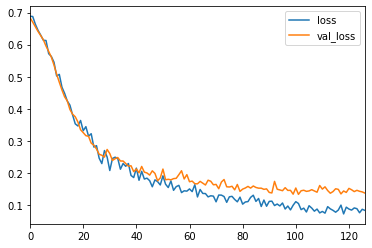

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

<b>Model Predictions:<b/>

In [37]:
model.predict_classes(X_test)

array([[0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [38]:
predictions = model.predict_classes(X_test)

<b>Model Metrics Reporting<b/>

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.95      0.96      0.96        81

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



[[58  4]
 [ 3 78]]
